<a href="https://colab.research.google.com/github/Sachinsachin21/Python-library/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
s=pd.read_csv("carzz.csv")
s.head()

,Name,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,Model_Year,Origin,High Speed Car
0,Amc Ambassador Brougham,13.0,8.0,360.0,175.0,3821.0,11.0,73.0,USA,Super Car
1,Amc Ambassador Dpl,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,USA,Super Car
2,Amc Ambassador Sst,17.0,8.0,304.0,150.0,3672.0,11.5,72.0,USA,Normal Car
3,Amc Concord,24.3,4.0,151.0,90.0,3003.0,20.1,80.0,USA,Normal Car
4,Amc Concord D/L,18.1,6.0,258.0,120.0,3410.0,15.1,78.0,USA,Normal Car


In [ ]:
s.describe()
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            301 non-null    object 
 1   MPG             300 non-null    float64
 2   Cylinders       300 non-null    float64
 3   Displacement    300 non-null    float64
 4   HorsePower      300 non-null    float64
 5   Weight          300 non-null    float64
 6   Acceleration    300 non-null    float64
 7   Model_Year      300 non-null    float64
 8   Origin          300 non-null    object 
 9   High Speed Car  301 non-null    object 
dtypes: float64(7), object(3)
memory usage: 23.7+ KB


In [ ]:
s.dropna(inplace=True)
s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            300 non-null    object 
 1   MPG             300 non-null    float64
 2   Cylinders       300 non-null    float64
 3   Displacement    300 non-null    float64
 4   HorsePower      300 non-null    float64
 5   Weight          300 non-null    float64
 6   Acceleration    300 non-null    float64
 7   Model_Year      300 non-null    float64
 8   Origin          300 non-null    object 
 9   High Speed Car  300 non-null    object 
dtypes: float64(7), object(3)
memory usage: 25.8+ KB


In [ ]:
s.sample(n=7,random_state=123)

,Name,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,Model_Year,Origin,High Speed Car
262,Toyota Celica Gt,32.0,4.0,144.0,96.0,2665.0,13.9,82.0,Japan,Normal Car
114,Dodge Monaco (Sw),12.0,8.0,383.0,180.0,4955.0,11.5,71.0,USA,Super Car
165,Honda Civic (Auto),32.0,4.0,91.0,67.0,1965.0,15.7,82.0,Japan,Normal Car
278,Triumph Tr7 Coupe,35.0,4.0,122.0,88.0,2500.0,15.1,80.0,Europe,Normal Car
293,Vw Rabbit C (Diesel),44.3,4.0,90.0,48.0,2085.0,21.7,80.0,Europe,Normal Car
169,Honda Prelude,33.7,4.0,107.0,75.0,2210.0,14.4,81.0,Japan,Normal Car
11,Amc Matador (Sw),15.0,8.0,304.0,150.0,3892.0,12.5,72.0,USA,Normal Car


In [ ]:
s.rename(columns={"HorsePower":"HP"},inplace=True)
s["Carz_grp"] = s.groupby(["Model_Year","Origin"]).MPG.transform("mean").round(2)
s.head()

,Name,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Model_Year,Origin,High Speed Car,Carz_grp
0,Amc Ambassador Brougham,13.0,8.0,360.0,175.0,3821.0,11.0,73.0,USA,Super Car,14.71
1,Amc Ambassador Dpl,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,USA,Super Car,14.11
2,Amc Ambassador Sst,17.0,8.0,304.0,150.0,3672.0,11.5,72.0,USA,Normal Car,16.93
3,Amc Concord,24.3,4.0,151.0,90.0,3003.0,20.1,80.0,USA,Normal Car,26.86
4,Amc Concord D/L,18.1,6.0,258.0,120.0,3410.0,15.1,78.0,USA,Normal Car,21.66


In [ ]:
s.pivot(index="Name",columns="Origin",values="MPG").stack().fillna(0)
pp = s.set_index(["Name","Origin"]).unstack(fill_value = 0)
pp.head()

MPG                    Cylinders                    \
Origin                  Europe Japan   USA europe    Europe Japan  USA europe   
Name                                                                            
Amc Ambassador Brougham    0.0   0.0  13.0    0.0       0.0   0.0  8.0    0.0   
Amc Ambassador Dpl         0.0   0.0  15.0    0.0       0.0   0.0  8.0    0.0   
Amc Ambassador Sst         0.0   0.0  17.0    0.0       0.0   0.0  8.0    0.0   
Amc Concord                0.0   0.0  24.3    0.0       0.0   0.0  4.0    0.0   
Amc Concord D/L            0.0   0.0  18.1    0.0       0.0   0.0  6.0    0.0   

                        Displacement        ... Model_Year         \
Origin                        Europe Japan  ...        USA europe   
Name                                        ...                     
Amc Ambassador Brougham          0.0   0.0  ...       73.0    0.0   
Amc Ambassador Dpl               0.0   0.0  ...       70.0    0.0   
Amc Ambassador Sst               0.0   0.0  ...       72.0    0.0   
Amc Concord                      0.0   0.0  ...       80.0    0.0   
Amc Concord D/L                  0.0   0.0  ...       78.0    0.0   

                        High Speed Car                          Carz_grp  \
Origin                          Europe Japan         USA europe   Europe   
Name                                                                       
Amc Ambassador Brougham              0     0   Super Car      0      0.0   
Amc Ambassador Dpl                   0     0   Super Car      0      0.0   
Amc Ambassador Sst                   0     0  Normal Car      0      0.0   
Amc Concord                          0     0  Normal Car      0      0.0   
Amc Concord D/L                      0     0  Normal Car      0      0.0   

                                             
Origin                  Japan    USA europe  
Name                                         
Amc Ambassador Brougham   0.0  14.71    0.0  
Amc Ambassador Dpl        0.0  14.11    0.0  
Amc Ambassador Sst        0.0  16.93    0.0  
Amc Concord               0.0  26.86    0.0  
Amc Concord D/L           0.0  21.66    0.0  

[5 rows x 36 columns]

In [ ]:
s.pivot_table(index="Name",columns="Origin",values="MPG",aggfunc="sum",fill_value=0,margins=True)

Origin,Europe,Japan,USA,europe,All
Name,,,,,
Amc Ambassador Brougham,0.0,0.0,13.0,0.0,13.0
Amc Ambassador Dpl,0.0,0.0,15.0,0.0,15.0
Amc Ambassador Sst,0.0,0.0,17.0,0.0,17.0
Amc Concord,0.0,0.0,24.3,0.0,24.3
Amc Concord D/L,0.0,0.0,18.1,0.0,18.1
...,...,...,...,...,...
amc concord dl,0.0,0.0,23.0,0.0,23.0
ford mustang cobra,0.0,0.0,23.6,0.0,23.6
renault 18i,0.0,0.0,0.0,34.5,34.5


In [ ]:
pps = {"USA":"USA","Europe":"EUROPE","Japan":"JAPAN"}
s.Origin.map(pps)

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
295    EUROPE
296    EUROPE
297    EUROPE
298    EUROPE
299    EUROPE
Name: Origin, Length: 300, dtype: object

In [ ]:
G_name=["Avg","Med","Nrml","Super","Top"]
pd.cut(s.MPG,5,right=True,labels= G_name)

0        Avg
1        Avg
2        Med
3       Nrml
4        Med
       ...  
295      Top
296    Super
297     Nrml
298     Nrml
299      Med
Name: MPG, Length: 300, dtype: category
Categories (5, object): ['Avg' < 'Med' < 'Nrml' < 'Super' < 'Top']

In [ ]:
pd.qcut(s.HP,5)

0      (145.0, 235.0]
1      (145.0, 235.0]
2      (145.0, 235.0]
3       (88.0, 105.0]
4      (105.0, 145.0]
            ...      
295    (45.999, 75.0]
296    (45.999, 75.0]
297    (45.999, 75.0]
298    (45.999, 75.0]
299    (45.999, 75.0]
Name: HP, Length: 300, dtype: category
Categories (5, interval[float64, right]): [(45.999, 75.0] < (75.0, 88.0] < (88.0, 105.0] <
                                           (105.0, 145.0] < (145.0, 235.0]]

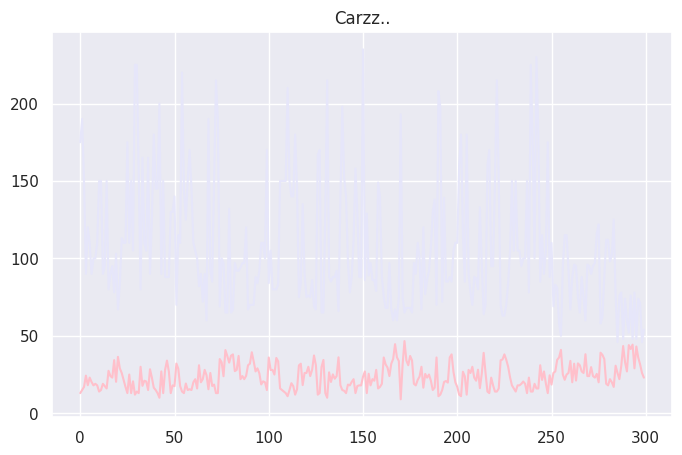

In [ ]:
s.MPG.plot(figsize=(8,5),color="pink")
s.HP.plot(figsize=(8,5),color="lavender")
plt.title("Carzz..")
plt.show()

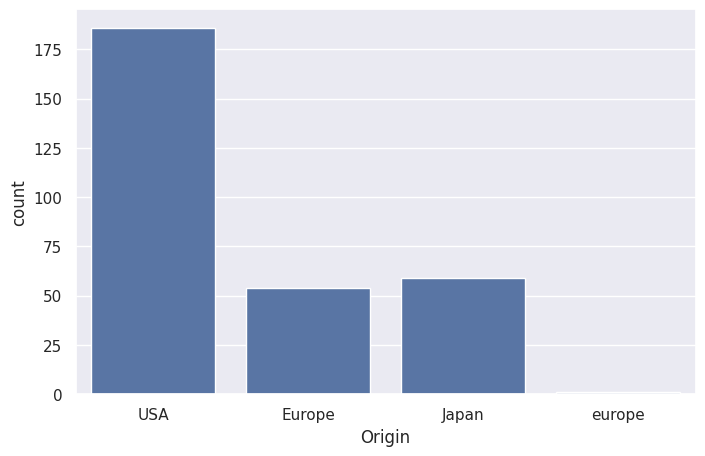

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data= s ,x="Origin")
plt.show()

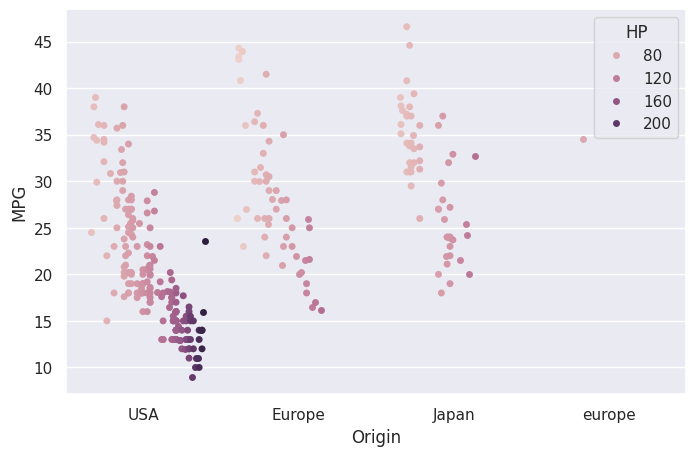

In [ ]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.stripplot(data= s ,x="Origin",y="MPG",jitter=False,hue="HP",dodge=True)
plt.show()

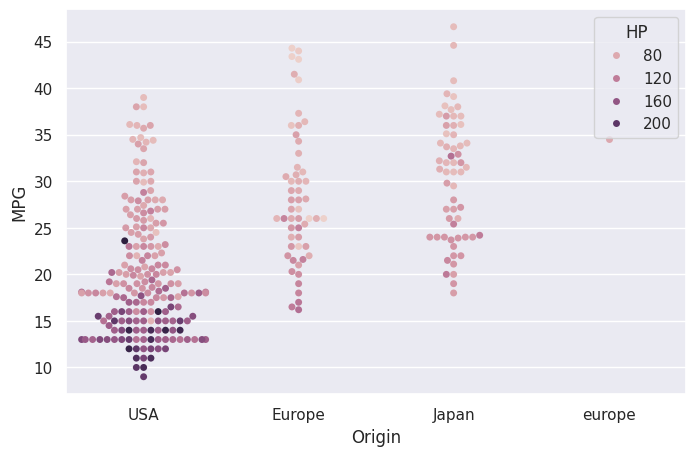

In [ ]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.swarmplot(data= s ,x="Origin",y="MPG",hue="HP",dodge=False)
plt.show()

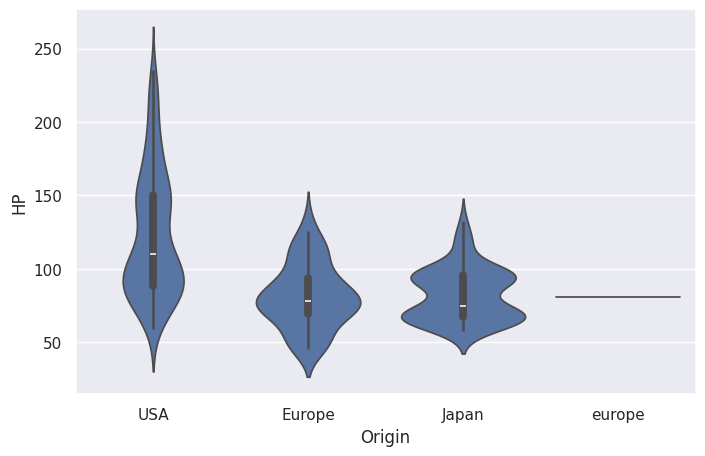

In [ ]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.violinplot(data= s ,x="Origin",y="HP",dodge=False,split=False)
plt.show()

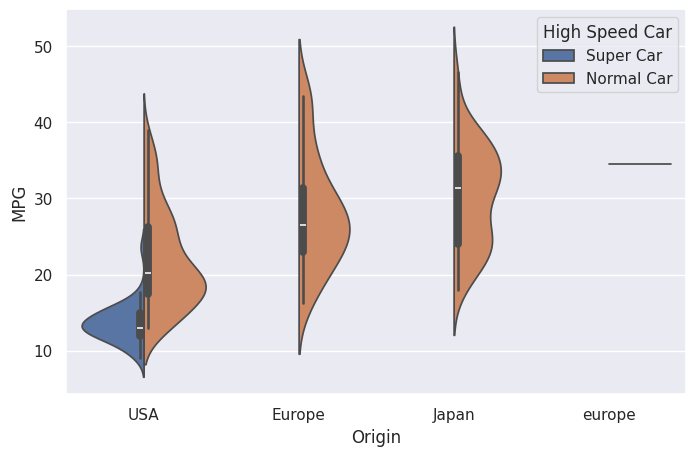

In [ ]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.violinplot(data= s ,x="Origin",y="MPG",hue="High Speed Car",dodge=True,split=True)
plt.show()

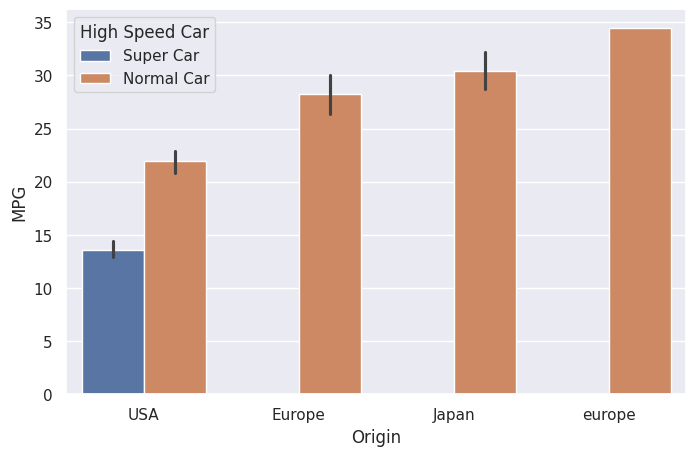

In [ ]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.barplot(data= s ,x="Origin",y="MPG",hue="High Speed Car",dodge=True)
plt.show()

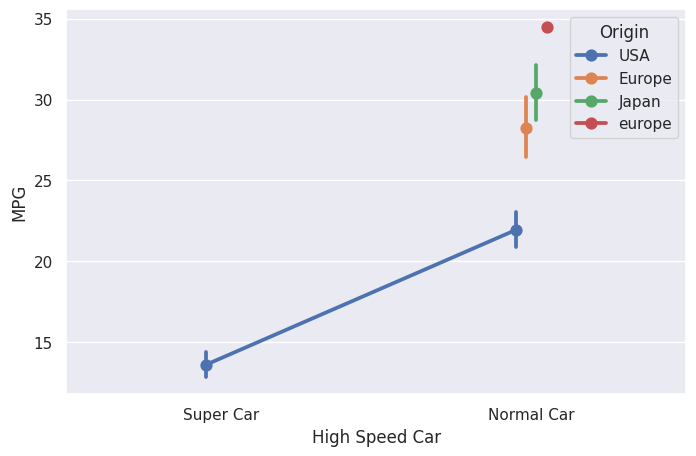

In [ ]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.pointplot(data= s ,x="High Speed Car",y="MPG",hue="Origin",dodge=True)
plt.show()

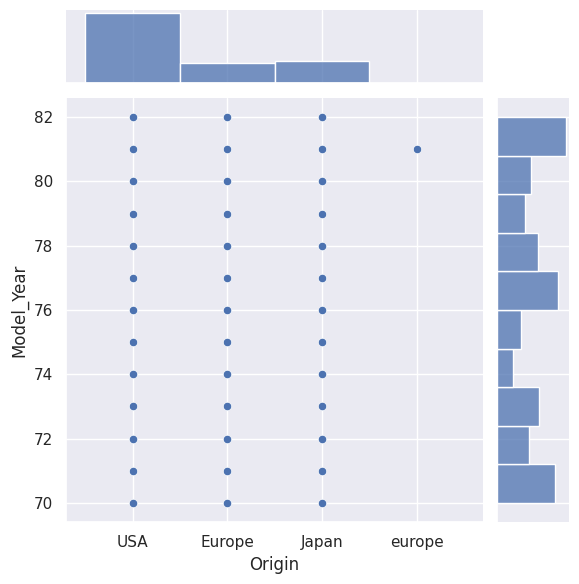

In [ ]:
sns.set(font_scale=1)
sns.jointplot(data= s ,x="Origin",y="Model_Year",height=6)
plt.show()

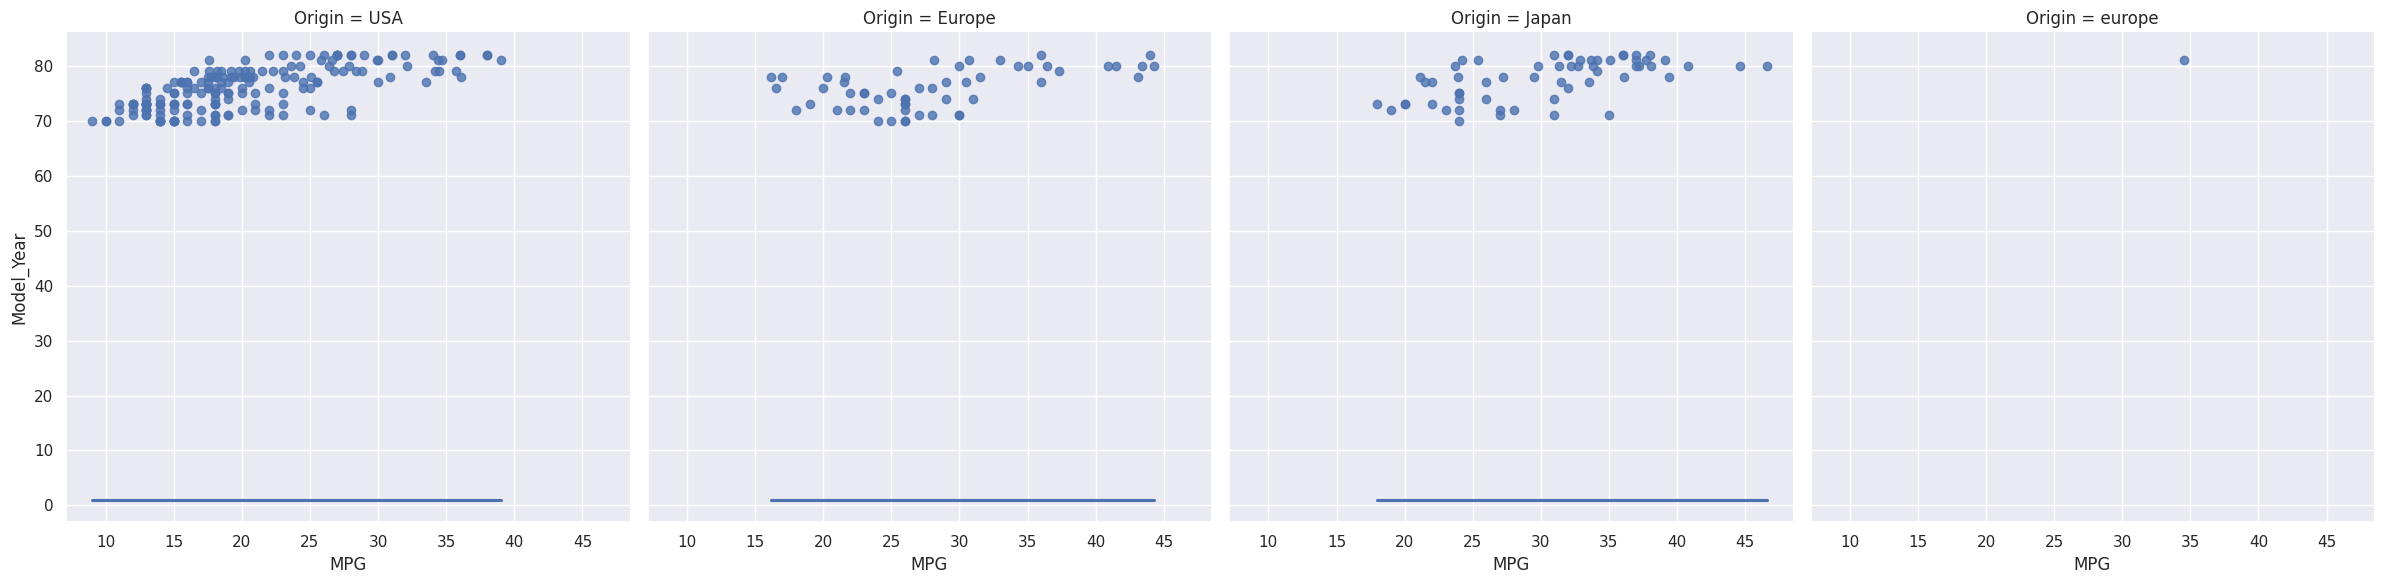

In [ ]:
sns.set(font_scale=1)
sns.lmplot(data= s ,x="MPG",y="Model_Year",height=6,aspect=1,col="Origin",logistic=True)
plt.show()

In [ ]:
pd.crosstab(s.MPG,s.Origin,margins=True)
s.rename(columns={"High Speed Car":"Car_Type"},inplace=True)

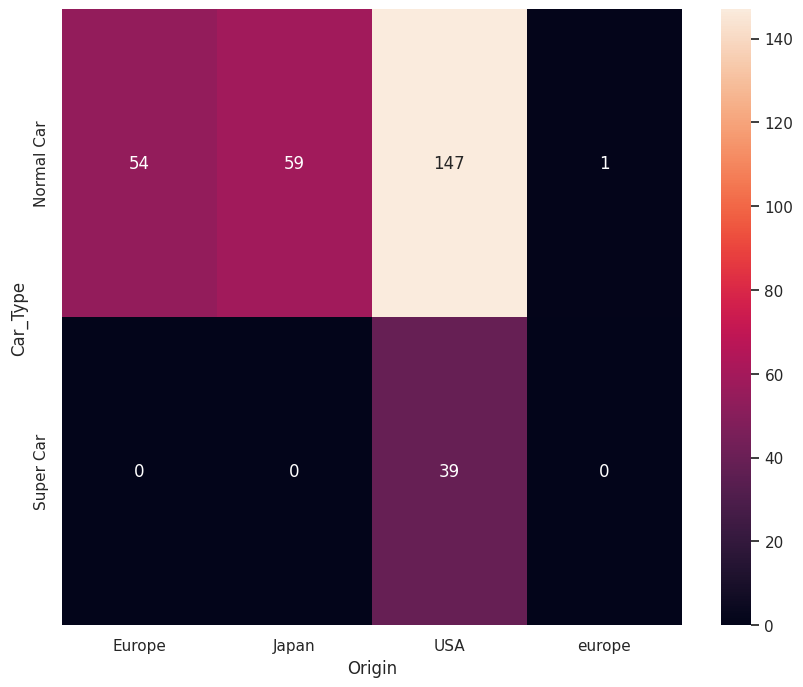

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.heatmap(pd.crosstab(s.Car_Type,s.Origin),fmt="d",annot=True)
plt.show()

In [ ]:
pd.crosstab(s.MPG,s.Origin,values=s.HP,aggfunc="mean")

Origin,Europe,Japan,USA,europe
MPG,,,,
9.0,NaN,NaN,193.000000,NaN
10.0,NaN,NaN,207.500000,NaN
11.0,NaN,NaN,199.333333,NaN
12.0,NaN,NaN,185.000000,NaN
13.0,NaN,NaN,158.000000,NaN
...,...,...,...,...
43.4,48.0,NaN,NaN,NaN
44.0,52.0,NaN,NaN,NaN
44.3,48.0,NaN,NaN,NaN


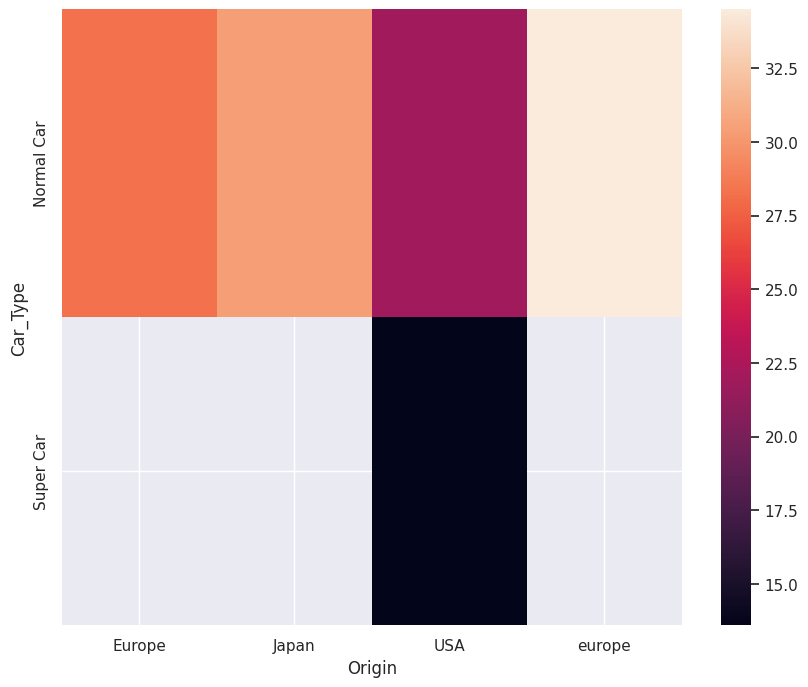

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.heatmap(pd.crosstab(s.Car_Type,s.Origin,values=s.MPG,aggfunc="mean"))
plt.show()

In [ ]:
h = pd.read_csv("summer.csv")
h1= h.groupby(["Country","Medal"]).Medal.count().unstack(fill_value=0)
h1.head()
h.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [ ]:
h1.sort_values(["Gold","Silver","Bronze"], ascending= False)[["Gold","Silver","Bronze"]]

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1


In [ ]:
s1 = pd.read_csv("wik_1976.csv")
s2 = pd.read_csv("wik_1996.csv")
s1.head()

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,Soviet Union (URS),49,41,35,125
1,2,East Germany (GDR),40,25,25,90
2,3,United States (USA),34,35,25,94
3,4,West Germany (FRG),10,12,17,39
4,5,Japan (JPN),9,6,10,25


In [ ]:
s1.isna().any()
s2.isna().any()
s2.head()

,Rank,Nation,Gold,Silver,Bronze,Total
0,1,United States (USA)*,44,32,25,101
1,2,Russia (RUS),26,21,16,63
2,3,Germany (GER),20,18,27,65
3,4,China (CHN),16,22,12,50
4,5,France (FRA),15,7,15,37


In [ ]:
s1.NOC.str.split("(",expand=True).iloc[:,1].str.replace(")","").str.replace("*","")
s2.Nation.str.split("(",expand=True).iloc[:,1].str.replace(")","").str.replace("*","")

0            USA
1            RUS
2            GER
3            CHN
4            FRA
         ...    
75           MOZ
76           PUR
77           TUN
78           UGA
79    79 nations
Name: 1, Length: 80, dtype: object

In [ ]:
s1.drop(columns=["Rank","NOC","Total"],inplace=True)
s2.drop(columns=["Rank","Nation","Total"],inplace=True)

In [ ]:
s1.head()
s2.head()

,Gold,Silver,Bronze
0,44,32,25
1,26,21,16
2,20,18,27
3,16,22,12
4,15,7,15


In [ ]:
h.Event.str.lower().str.contains("mixed").sum()

38

In [ ]:
h.Event.str.lower().str.contains("pairs").sum()

12

In [ ]:
h.Sport.str.lower().str.contains("equestrian").sum()

939

In [ ]:
h["Event_Medals"]=h.groupby(["Year","Sport","Discipline","Event"]).Medal.transform("count")
h.Event_Medals.value_counts().sort_index()
h.loc[h.Event_Medals==7]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Event_Medals
3714,1920,Antwerp,Sailing,Sailing,"HERSETH, Erik Johan",NOR,Men,10M (Rating 1907),Gold,7
3715,1920,Antwerp,Sailing,Sailing,"HOLTER, Sigurd",NOR,Men,10M (Rating 1907),Gold,7
3716,1920,Antwerp,Sailing,Sailing,"JAMVOLD, Gunnar",NOR,Men,10M (Rating 1907),Gold,7
3717,1920,Antwerp,Sailing,Sailing,"JAMVOLD, Petter",NOR,Men,10M (Rating 1907),Gold,7
3718,1920,Antwerp,Sailing,Sailing,"JUELL, Claus",NOR,Men,10M (Rating 1907),Gold,7
...,...,...,...,...,...,...,...,...,...,...
30021,2012,London,Cycling,Cycling Track,"MULDER, Teun",NED,Men,Keirin,Bronze,7
30022,2012,London,Cycling,Cycling Track,"VAN VELTHOOVEN, Simon",NZL,Men,Keirin,Bronze,7
30023,2012,London,Cycling,Cycling Track,"PENDLETON, Victoria",GBR,Women,Keirin,Gold,7
30024,2012,London,Cycling,Cycling Track,"GUO, Shuang",CHN,Women,Keirin,Silver,7


In [ ]:
h["Team"]=pd.Series(np.where(h.Event_Medals>5,"Yes","No"))
h.head()
h.Team.value_counts()

Team
Yes    24014
No      7151
Name: count, dtype: int64

In [ ]:
q2 = h.loc[h.Team=="Yes"].copy()
q2.shape

(24014, 11)

In [ ]:
q1 = h.loc[h.Team=="No"].copy()
q1.shape

(7151, 11)

In [ ]:
q2.drop_duplicates(subset=["Year","Discipline","Sport","Country","Event"],inplace=True)
q2.shape

(5970, 11)

In [ ]:
pd.concat([q1,q2]).shape

(13121, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            301 non-null    object 
 1   MPG             300 non-null    float64
 2   Cylinders       300 non-null    float64
 3   Displacement    300 non-null    float64
 4   HorsePower      300 non-null    float64
 5   Weight          300 non-null    float64
 6   Acceleration    300 non-null    float64
 7   Model_Year      300 non-null    float64
 8   Origin          300 non-null    object 
 9   High Speed Car  301 non-null    object 
dtypes: float64(7), object(3)
memory usage: 23.7+ KB


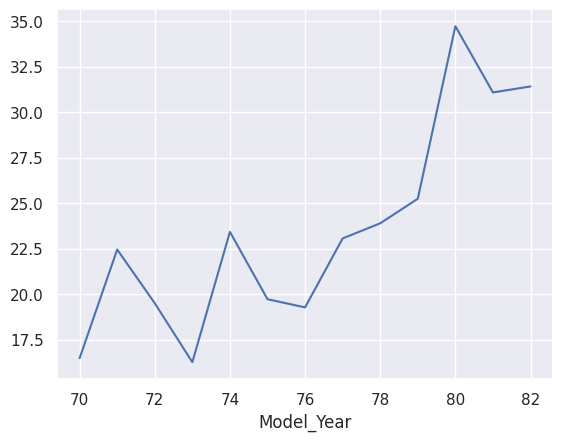

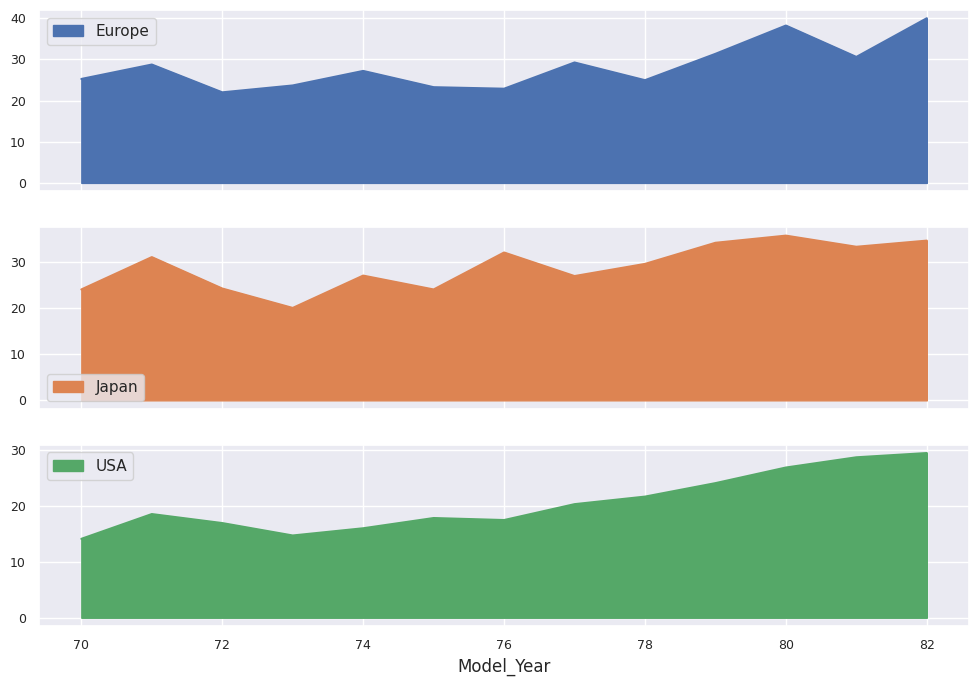

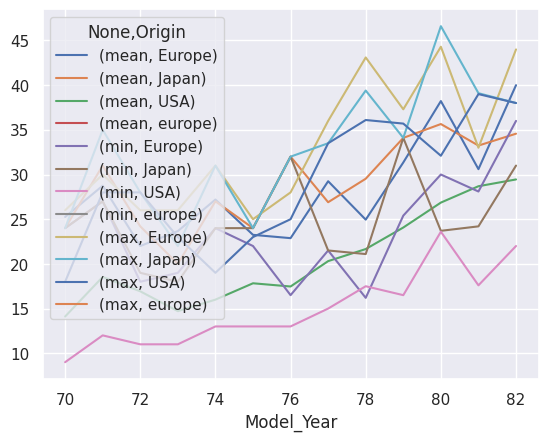

array(['no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no',

In [ ]:
s = pd.read_csv("carzz.csv")
s.head()
s.info()
s.groupby("Origin").MPG.mean()
s.tail()
s.isna().sum()
s.dropna()
sp = s.groupby("Model_Year").MPG.mean().round(2)
sp.plot()
plt.show()
ps = s.groupby(["Model_Year","Origin"]).MPG.mean().unstack().round(2)
ps.drop(columns=["europe"],inplace = True)
ps.plot(kind="area",subplots = True,figsize=(12,8),fontsize=9)
plt.show()
ss = s.groupby(["Model_Year","Origin"]).MPG.agg(["mean","min","max"]).unstack().round(2)
ss.plot()
plt.show()

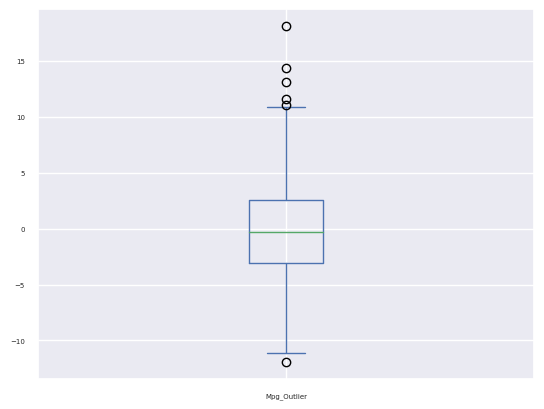

Origin,NaN,Europe,Japan,USA,europe
Name,,,,,
NaN,0.0,0.0,0.0,0.0,0.0
Amc Ambassador Brougham,0.0,0.0,0.0,13.0,0.0
Amc Ambassador Dpl,0.0,0.0,0.0,15.0,0.0
Amc Ambassador Sst,0.0,0.0,0.0,17.0,0.0
Amc Concord,0.0,0.0,0.0,24.3,0.0
...,...,...,...,...,...
Vw Type 3,0.0,23.0,0.0,0.0,0.0
amc concord dl,0.0,0.0,0.0,23.0,0.0
ford mustang cobra,0.0,0.0,0.0,23.6,0.0


In [ ]:
def get_most_efficient(group):
    return group.nlargest(n=3, columns = "MPG").loc[:,["Name","MPG"]]
m = s.groupby(["Model_Year","Origin"]).apply(get_most_efficient)
ms = m.droplevel(-2)
m.head(20)
m.loc[80,"Japan"]
s["Carz_grp"] = s.groupby(["Model_Year","Origin"]).MPG.transform("mean").round(2)
s.head()
s.tail()
s.dropna()
s["Mpg_Outlier"] = (s.MPG - s.Carz_grp).round(2)
s.head()
s.Mpg_Outlier.describe()
s.loc[s.Mpg_Outlier.abs() > 10]
s.Mpg_Outlier.plot(kind="box",fontsize=5)
plt.show()
s.transform
s.pivot(index="Name",columns="Origin",values="MPG").fillna(0)

In [ ]:
pp = s.set_index(["Name","Origin"]).unstack(fill_value = 0)
pp.head()
pp.dropna(inplace=True)
pp.shape
s.pivot_table(index="Name",columns="Origin",values="MPG",aggfunc="sum",fill_value=0,margins=True)
pd.crosstab(s.MPG,s.Origin,margins=True)

Origin,Europe,Japan,USA,europe,All
MPG,,,,,
9.0,0,0,1,0,1
10.0,0,0,2,0,2
11.0,0,0,3,0,3
12.0,0,0,6,0,6
13.0,0,0,19,0,19
...,...,...,...,...,...
44.0,1,0,0,0,1
44.3,1,0,0,0,1
44.6,0,1,0,0,1


In [ ]:
ss1 = s.rename(columns={"HorsePower":"HP"},inplace=True)
ss1
s.HP.head()
s.HP.add(s.MPG)
s.HP.sub(s.MPG).fillna(0)
s.HP.mul(s.MPG).fillna(0)
s.HP.floordiv(s.MPG).fillna(0)
pps = {"USA":"USA","Europe":"EUROPE","Japan":"JAPAN"}
s.Origin.map(pps).dropna()
np.where(s.HP == 190,"yes","no")

array(['no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no',

In [ ]:
s.MPG.mean()
s.MPG.median()
s.MPG.quantile([0.25,0.5,0.75])

0.25    17.500
0.50    23.000
0.75    29.825
Name: MPG, dtype: float64

In [ ]:
pp = s.groupby("Origin").sum()
s.groupby("MPG")[["Origin","High Speed Car"]].max()
sp = s.iloc[:20,[1,9,8]]
sp.max()
list(sp.groupby("High Speed Car"))[0][1]
list(sp.groupby("High Speed Car"))[1][1]
list(sp.groupby("Origin"))[0][1]
list(sp.groupby("Origin"))[1][1]

,MPG,High Speed Car,Origin
0,13.0,Super Car,USA
1,15.0,Super Car,USA
2,17.0,Normal Car,USA
3,24.3,Normal Car,USA
4,18.1,Normal Car,USA
5,23.0,Normal Car,USA
6,20.2,Normal Car,USA
7,18.0,Normal Car,USA
8,19.0,Normal Car,USA
9,18.0,Normal Car,USA
